# Credit Card Fraud Detection 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


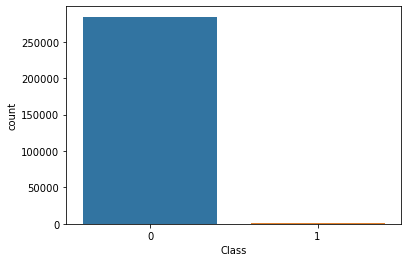

In [6]:
sns.countplot("Class",data=data)

In [7]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
# Target and Predictor Variables
X = data.drop("Class",axis=1)
y = data['Class']

In [9]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV

In [16]:
lr = LogisticRegression()
params = {'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}
cv = KFold(n_splits=5,shuffle=False)

In [19]:
grid = GridSearchCV(lr,param_grid=params,cv=cv,scoring='f1_macro',n_jobs=-1,verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   26.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro', verbose=1)

In [20]:
y_pred = grid.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test,y_pred))
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred))

Accuracy Score:  0.9988881476539916
Confusion Matrix: 
 [[85273    34]
 [   61    75]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.69      0.55      0.61       136

    accuracy                           1.00     85443
   macro avg       0.84      0.78      0.81     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC Score:  0.7755360138710085


### Random Forest

In [28]:
class_weight = {0:1,1:100}
# It doesn't affect much earlier was better

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
# Without class weight
y_pred = rfc.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test,y_pred))
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred))

Accuracy Score:  0.999602073897218
Confusion Matrix: 
 [[85300     7]
 [   27   109]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.80      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC Score:  0.9006942658315744


In [27]:
# With class weight
y_pred = rfc.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test,y_pred))
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred))

Accuracy Score:  0.9996254813150287
Confusion Matrix: 
 [[85303     4]
 [   28   108]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.96      0.79      0.87       136

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC Score:  0.897035378794513


## Under Sampling

In [1]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [10]:
ns = NearMiss(0.8)
X_train_ns,y_train_ns = ns.fit_resample(X_train,y_train)
print("The number of classes before undersampling: ",Counter(y_train))
print("The number of classes after undersampling: ",Counter(y_train_ns))

The number of classes before undersampling:  Counter({0: 199008, 1: 356})
The number of classes after undersampling:  Counter({0: 445, 1: 356})


In [13]:
0.8*445

356.0

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
y_pred = rfc.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test,y_pred))
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred))

Accuracy Score:  0.6926606041454537
Confusion Matrix: 
 [[59054 26253]
 [    7   129]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.69      0.82     85307
           1       0.00      0.95      0.01       136

    accuracy                           0.69     85443
   macro avg       0.50      0.82      0.41     85443
weighted avg       1.00      0.69      0.82     85443

ROC AUC Score:  0.8203910495587218


## Over Sampling

In [17]:
from imblearn.over_sampling import RandomOverSampler

In [21]:
os = RandomOverSampler(0.75)
X_train_os,y_train_os = os.fit_resample(X_train,y_train)
print("The number of classes before undersampling: ",Counter(y_train))
print("The number of classes after undersampling: ",Counter(y_train_os))

The number of classes before undersampling:  Counter({0: 199008, 1: 356})
The number of classes after undersampling:  Counter({0: 199008, 1: 149256})


In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_os,y_train_os)

RandomForestClassifier()

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
y_pred = rfc.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test,y_pred))
# print("ROC AUC Score: ",roc_auc_score(y_test,y_pred))

Accuracy Score:  0.9996254813150287
Confusion Matrix: 
 [[85301     6]
 [   26   110]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.81      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



## SOMTE Tomek

In [24]:
from imblearn.combine import SMOTETomek

In [25]:
os = SMOTETomek(0.75)
X_train_os,y_train_os = os.fit_resample(X_train,y_train)
print("The number of classes before undersampling: ",Counter(y_train))
print("The number of classes after undersampling: ",Counter(y_train_os))

KeyboardInterrupt: 